In [1]:
import pydicom as pdi
import glob
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
import pandas as pd

In [2]:
def drawer(img):
    plt.figure(figsize=(16,8))
    plt.imshow(img,cmap='gray')    

In [4]:
# dicom image중 full mammogram images만 찾기

full_path = glob.glob('../../DataSet/tcia_data/CBIS-DDSM/*/*/*/*.dcm')

full_mammogram_images = []
ROI_mammogram_images = []
for i in range(len(full_path)):
    split = full_path[i].split("\\")
    fullORRoi = split[-2].split("-")
    if fullORRoi[-2] == "full mammogram images":
        full_mammogram_images.append(full_path[i])
    else:
        ROI_mammogram_images.append(full_path[i])

In [9]:
full_mammo_path = full_mammogram_images[1]
ROI_mammo_path = ROI_mammogram_images[2]
ROI_mammo_path_ = ROI_mammogram_images[3]
print(full_mammo_path,'\n',ROI_mammo_path,'\n',ROI_mammo_path_)

../../DataSet/tcia_data/CBIS-DDSM\Calc-Test_P_00038_LEFT_MLO\08-29-2017-DDSM-17613\1.000000-full mammogram images-97934\1-1.dcm 
 ../../DataSet/tcia_data/CBIS-DDSM\Calc-Test_P_00038_LEFT_MLO_1\08-29-2017-DDSM-11739\1.000000-ROI mask images-88680\1-1.dcm 
 ../../DataSet/tcia_data/CBIS-DDSM\Calc-Test_P_00038_LEFT_MLO_1\08-29-2017-DDSM-11739\1.000000-ROI mask images-88680\1-2.dcm


In [112]:
full_mammo_ID = full_mammo_path.split("\\")[1].split("_")[2]
ROI_mammo_ID = ROI_mammo_path.split("\\")[1].split("_")[2]

In [113]:
if full_mammo_ID == ROI_mammo_ID:
    print("same")
else:
    print("Nope")

same


In [10]:
full_dcm = pdi.read_file(full_mammo_path)
roi_dcm = pdi.read_file(ROI_mammo_path)
roi_dcm_ = pdi.read_file(ROI_mammo_path_)

In [11]:
full_img = full_dcm.pixel_array
roi_img = roi_dcm.pixel_array
roi_img_ = roi_dcm_.pixel_array

In [116]:
full_img_height, full_img_width = full_img.shape
roi_img_height, roi_img_width = roi_img.shape

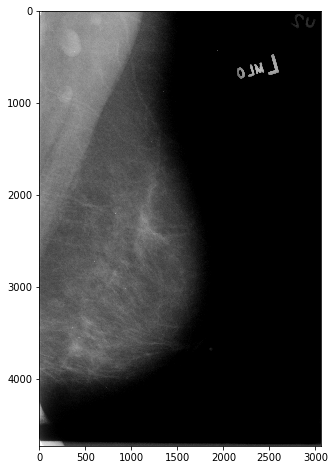

In [12]:
drawer(full_img)

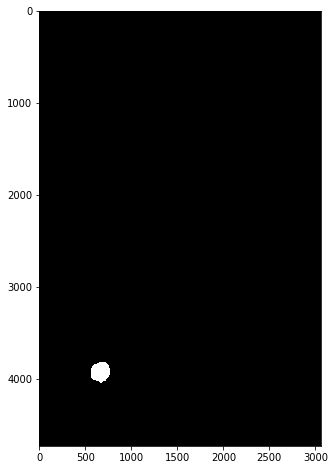

In [14]:
drawer(roi_img_)

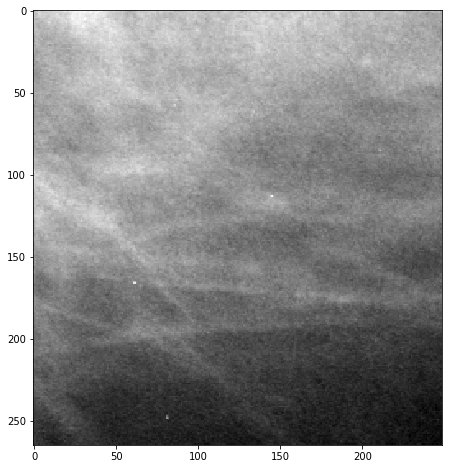

In [15]:
drawer(roi_img)

In [117]:
# full_img_norm = full_img.astype(np.float32)
# roi_img_norm = roi_img.astype(np.float32)
# cv.normalize(full_img_norm,full_img_norm,255)

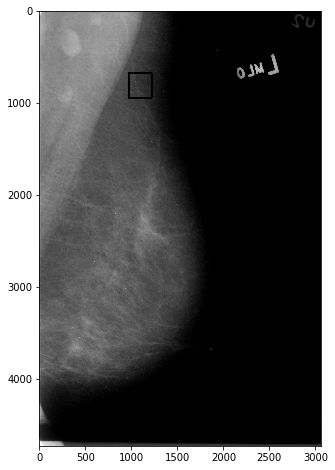

In [118]:
a = full_img.astype(np.uint8)
b = roi_img.astype(np.uint8)
match_info = cv.matchTemplate(a,b,cv.TM_SQDIFF)
_, _, minLoc, maxLoc = cv.minMaxLoc(match_info)


cv.rectangle(full_img,minLoc,(minLoc[0]+roi_img_width,minLoc[1]+roi_img_height),(0),20)
#cv.rectangle(full_img_norm,maxLoc,(maxLoc[0]+roi_img_width,maxLoc[1]+roi_img_height),(0),20)
drawer(full_img)

In [126]:
minLoc, maxLoc

((975, 677), (1863, 3693))

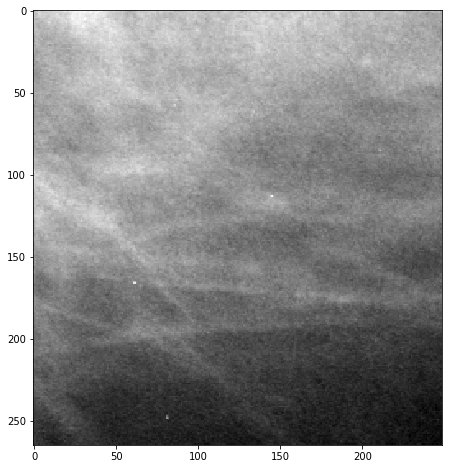

In [119]:
drawer(roi_img)

In [78]:
x,y,w,h = minLoc[1], minLoc[0], roi_img_width, roi_img_height

In [6]:
pdi.read_file(full_mammo_path[0])

(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.6.1.4.1.9590.100.1.2.289923739312470966435676008311959891294
(0008, 0020) Study Date                          DA: ''
(0008, 0023) Content Date                        DA: '20160503'
(0008, 0030) Study Time                          TM: ''
(0008, 0033) Content Time                        TM: '105946.779000'
(0008, 0050) Accession Number                    SH: ''
(0008, 0060) Modality                            CS: 'MG'
(0008, 0064) Conversion Type                     CS: 'WSD'
(0008, 0090) Referring Physician's Name          PN: ''
(0010, 0010) Patient's Name                      PN: 'P_00038^P_00038'
(0010, 0020) Patient ID                          LO: 'P_00038_LEFT_CC.dcm'
(0010, 0030) Patient's Birth Date                DA: ''
(0010, 0040) Patient's Sex                       CS: ''

In [17]:
bin_path = glob.glob('../../DataSet/tcia_data/CBIS-DDSM/*/*/*/1-2.dcm')
full_mammo_path = glob.glob('../../DataSet/tcia_data/CBIS-DDSM/*/*/1.000000-full*/1-1.dcm')

In [18]:
test_path = glob.glob('../../DataSet/CBIS_DDSM/*/*/*/1-2.dcm')
test_path

[]

../../DataSet/tcia_data/CBIS-DDSM\Calc-Test_P_00038_LEFT_MLO_1\08-29-2017-DDSM-11739\1.000000-ROI mask images-88680\1-2.dcm
../../DataSet/tcia_data/CBIS-DDSM\Calc-Test_P_00038_LEFT_MLO\08-29-2017-DDSM-17613\1.000000-full mammogram images-97934\1-1.dcm


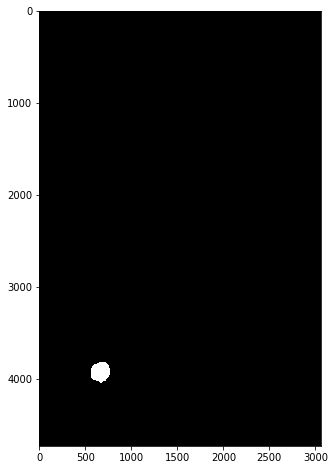

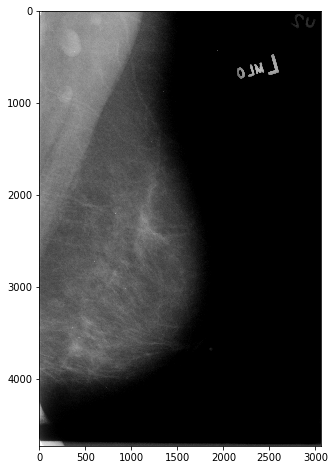

In [19]:
idx = 1
bin_img = pdi.read_file(bin_path[idx]).pixel_array
full_img = pdi.read_file(full_mammo_path[idx]).pixel_array
#plt.figure(figsize=(16,8))
#plt.title(bin_path[idx])
print(bin_path[idx])
drawer(bin_img)
print(full_mammo_path[idx])
drawer(full_img)

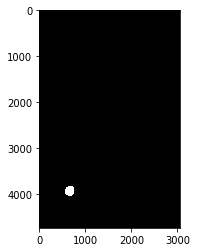

In [27]:
test_img = pdi.read_file(bin_path[1]).pixel_array
plt.imshow(test_img,cmap='gray')

In [11]:
test_img.shape

(5664, 3984)

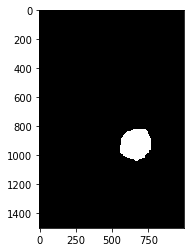

In [28]:
test_area = test_img[3000:4500,0:1000]
plt.imshow(test_area,cmap='gray')

In [22]:
test_info = cv.findNonZero(test_area)


In [23]:
min_y = test_info[...,0].min()
max_y = test_info[...,0].max()

min_x = test_info[...,1].min()
max_x = test_info[...,1].max()

minLoc = (min_y,min_x)
maxLoc = (max_y,max_x)

In [32]:
minLoc

(216, 524)

In [24]:
test_area_copy = test_area.copy()

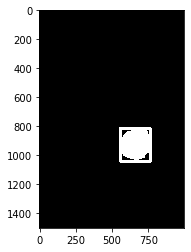

In [26]:
cv.rectangle(test_area_copy,minLoc,maxLoc,255,20)
plt.imshow(test_area_copy,cmap='gray')

In [38]:
test_df = pd.DataFrame(columns=['file_path', 'min_x','min_y','max_x','max_y'])

In [43]:
test_path[0]

'../../DataSet/CBIS_DDSM\\Calc-Test_P_00041_LEFT_CC_2\\08-29-2017-DDSM-12775\\1.000000-ROI mask images-79220\\1-2.dcm'

In [44]:
test_df['file_path'] = test_path[0]

In [45]:
test_df

,file_path,min_x,min_y,max_x,max_y
